In [92]:
from pathlib import Path
from typing import Union, Generator
from typing import List
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as ani
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly
from datetime import datetime
from datetime import timedelta
from typing import List
from pandas import Series,DataFrame
import matplotlib.animation as animation
from matplotlib.pylab import *
import seaborn

from scipy import  stats
import datetime
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

from collections import Counter
from collections import namedtuple
from random import randint

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
# we have two data from two webs
#gdp
# https://data.worldbank.org/indicator/NY.GDP.MKTP.KN?end=2019&start=1960  
#project2
# this data I select unemployeement rate/GDP/IMPORT/EMPORT
# https://tradingeconomics.com/country-list/gdp 



In [93]:
df = pd.read_excel (r'C:\Users\Administrator\Desktop\project2.xlsx')
df3 = pd.read_csv('gdp.csv') # there is the GDP data by year     # there is the GDP for every year by each country
df3.set_index("Country Name", inplace = True) 
col=["Country Code","Indicator Name","Indicator Code","Region",
    "IncomeGroup","SpecialNotes","TableName" ]  
df3.drop(col, inplace=True, axis=1) # Clean up some data 
df3=df3/100000000 # make it readerble
df3.dropna(axis=0,how='any')# delete the nan value



Category = namedtuple('Category', ['name', 'rank'])
Warehouse = namedtuple('Warehouse', ['name', 'rank'])
Bar = namedtuple('Bar', ['instance', 'height'])
DataRow = namedtuple('DataRow', ['category', 'warehouse'])

In [94]:
df.head()

,EMPORT,Last,Previous,Reference,Unit,IMPORT,Last1,Previous1,Reference1,Unit1,UR,Last2,Previous2,Reference2,Unit2,GDP,Last3,Previous3,Reference3,Unit3
0,Argentina,140.0,150.0,2020-06-20,points,Argentina,112.0,113.0,2020-06-20,points,Argentina,13.1,10.4,2020-06-20,%,Argentina,450.00,520.00,2020-12-19,USD Billion
1,Armenia,98.4,106.0,2020-08-20,points,Armenia,100.0,103.0,2020-08-20,points,Armenia,17.5,19.8,2020-06-20,%,Armenia,13.67,12.46,2020-12-19,USD Billion
2,Australia,109.0,112.0,2020-06-20,points,Australia,111.0,113.0,2020-06-20,points,Australia,6.9,6.8,2020-09-20,%,Australia,1393.00,1434.00,2020-12-19,USD Billion
3,Azerbaijan,127.0,83.7,2020-12-17,points,Azerbaijan,123.0,103.0,2020-12-17,points,Azerbaijan,4.8,5.2,2020-12-19,%,Azerbaijan,48.05,47.11,2020-12-19,USD Billion
4,Bangladesh,237.0,226.0,2020-12-20,points,Bangladesh,277.0,259.0,2020-12-20,points,Bangladesh,4.2,4.3,2020-12-19,%,Bangladesh,303.00,274.00,2020-12-19,USD Billion


In [95]:
#df.info() # check nan value
df=df.dropna(axis=0,how='any')#delete all nan value
#df.info()

In [96]:
cols =['EMPORT','Last','Last1','Last2','Last3'] # rename the columns
df1 = df[cols]
df1=df1.rename(columns={'EMPORT':'Country','Last':'Emport','Last1':'Import',
                    'Last2':'Unemployeement_rate','Last3':'GDP'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 66
Data columns (total 5 columns):
Country                66 non-null object
Emport                 66 non-null float64
Import                 66 non-null float64
Unemployeement_rate    66 non-null float64
GDP                    66 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


<IPython.core.display.Javascript object>


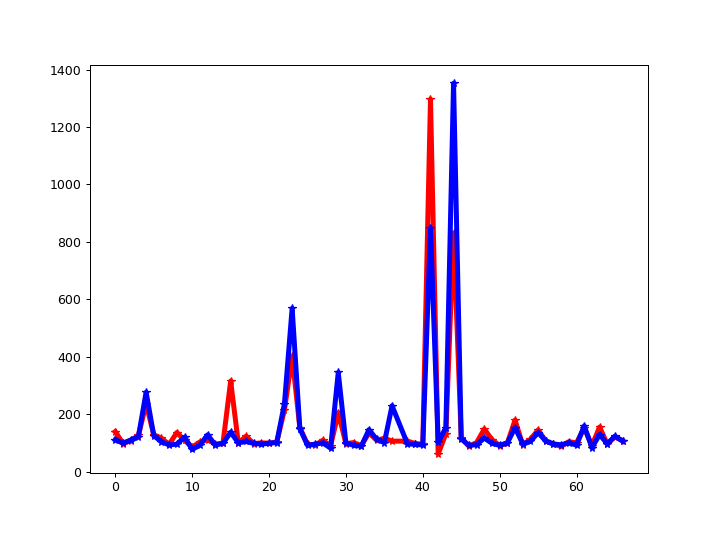

In [119]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(df1['Emport'], color="r", linestyle="-", marker="*", linewidth=4) 
plt.plot(df1['Import'], color="b", linestyle="-", marker="*", linewidth=4) 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<IPython.core.display.Javascript object>


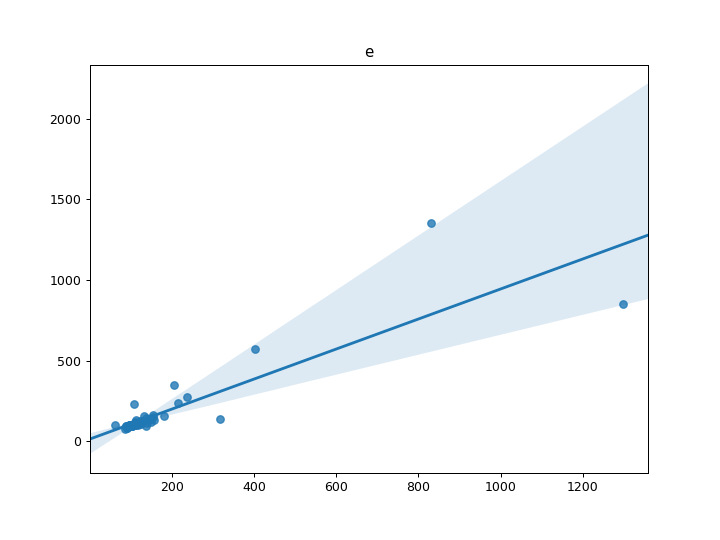

Text(0.5, 1.0, 'e')

In [120]:
seaborn.regplot(x='Emport', y='Import', data=df1, fit_reg=True)  
plt.xlabel("")
plt.ylabel('')
plt.title("e")

Enter how many country: 5


<IPython.core.display.Javascript object>


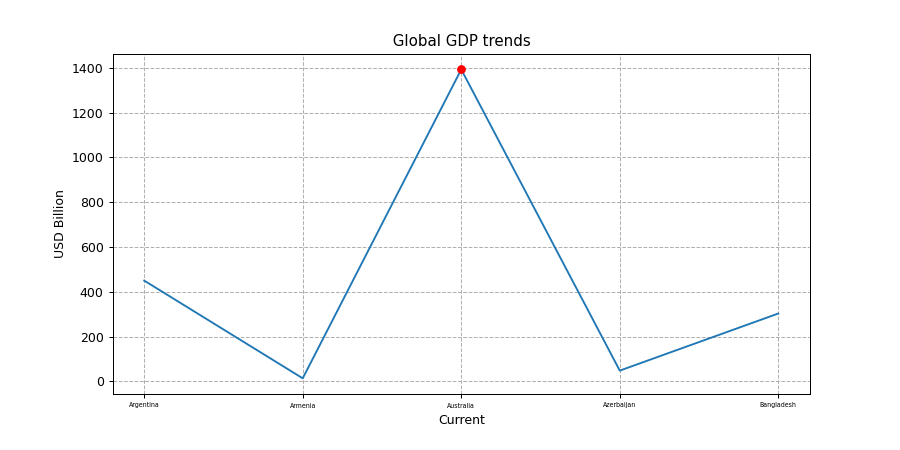

In [100]:
x=0
x=int(input('Enter how many country: '))

list4=[]
y1=[]

for i in range(x):
    list4.append(df1['Country'][i])
    y1.append(df1['GDP'][i])
    
%matplotlib notebook
from matplotlib.animation import FuncAnimation
def update_points(num):
    point_ani.set_data(list4[num], y1[num])
    return point_ani,

#%matplotlib notebook

fig = plt.figure(figsize=(10,5))

plt.tick_params(axis='x', labelsize=5)
plt.plot(list4,y1)
point_ani, = plt.plot(list4[0], y1[0], "ro")
plt.grid(ls="--")
plt.xlabel("Current")
plt.ylabel("USD Billion")
plt.title(" Global GDP trends ")
ani =FuncAnimation(fig, update_points, np.arange(0, 66), interval=500, blit=True)
plt.show()

In [102]:
df3 = df3.transpose()

In [103]:
col=['Israel', 'Italy','France','Germany', 'United States','India','Canada','China']

df5=df3[col]

In [104]:
df5.head()

Country Name,Israel,Italy,France,Germany,United States,India,Canada,China
1960,25.985000,403.852883,622.254780,NaN,5433.0,370.298839,404.617217,597.164676
1961,31.385000,448.427603,674.616442,NaN,5633.0,392.324358,409.349521,500.568690
1962,25.100000,503.838919,756.075298,NaN,6051.0,421.614819,422.274476,472.093590
1963,29.923333,577.107431,847.591951,NaN,6386.0,484.219235,450.299886,507.067999
1964,34.053333,631.754170,940.078510,NaN,6858.0,564.802899,493.775229,597.083435


In [105]:
df5=df5.fillna(0)
df5.head()

Country Name,Israel,Italy,France,Germany,United States,India,Canada,China
1960,25.985000,403.852883,622.254780,0.0,5433.0,370.298839,404.617217,597.164676
1961,31.385000,448.427603,674.616442,0.0,5633.0,392.324358,409.349521,500.568690
1962,25.100000,503.838919,756.075298,0.0,6051.0,421.614819,422.274476,472.093590
1963,29.923333,577.107431,847.591951,0.0,6386.0,484.219235,450.299886,507.067999
1964,34.053333,631.754170,940.078510,0.0,6858.0,564.802899,493.775229,597.083435


In [106]:
df5.reset_index(level=0, inplace=True)

<IPython.core.display.Javascript object>


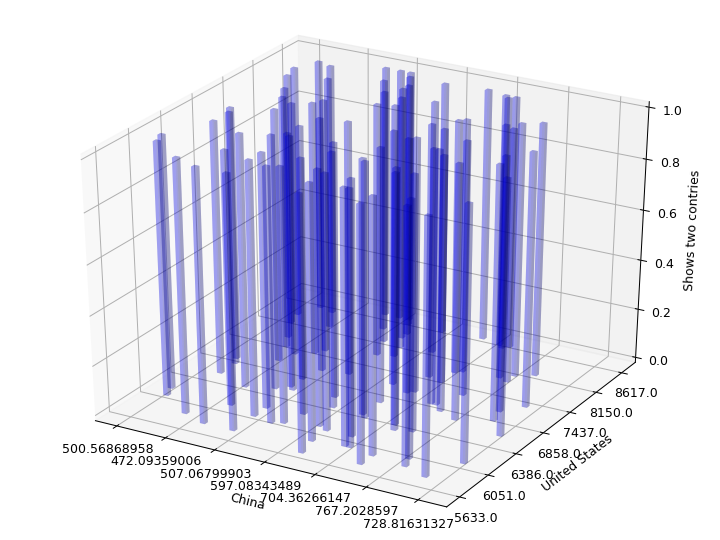

In [107]:

China = df5['China']
united = df5['United States']
c_count = len(China)
wh_count = len(united)
ROWS_COUNT = 100

DATA = [DataRow(randint(0, c_count), randint(0, wh_count)) for i in range(ROWS_COUNT)]
COLOR_MAP = {}  # can specify colors for certain cat / wh
CACHE_CHUNK_SIZE = 5
def update(num, bars_collection: dict) -> dict:
    cache = [DATA.pop(0) for i in range(CACHE_CHUNK_SIZE) if DATA]
    if cache:
        prepared_cache = Counter(cache)
        for row, count in prepared_cache.items():
            if row in bars_collection:
                current_bar: Bar = bars_collection[row]
                bars_collection[row]: dict = Bar(ax.bar3d(
                    row.category, row.warehouse, 0, 1, 1, current_bar.height + count,
                    color=COLOR_MAP.get(row, 'b'),
                    alpha=0.8), current_bar.height + count)
            else:
                bars_collection[row] = Bar(ax.bar3d(
                    row.category, row.warehouse, 0, 1, 1, 1,
                    color=COLOR_MAP.get(row, 'b'),
                    alpha=0.2), 1)  # tuple
    return bars_collection

fig = plt.figure()
ax = p3.Axes3D(fig)

line_ani = animation.FuncAnimation(fig, update, 10, fargs=[dict()], interval=50, blit=False)

# add labels
ax.w_xaxis.set_ticklabels([c for c in China])
ax.w_yaxis.set_ticklabels([w for w in united])
ax.set_xlabel('China')
ax.set_ylabel('United States')
ax.set_zlabel('Shows two contries')

# perform
plt.show()

In [341]:
buses=df5['China'].astype('int')



In [342]:
pgdp=df5['United States'].astype('int')

In [343]:
d1 = pd.read_csv('UNRATE.csv')

In [344]:
d1.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [345]:
d1['DATE'] = pd.to_datetime(d1['DATE'])
d1 = d1.set_index('DATE')

In [346]:
s = pd.Series(d1['UNRATE'], index=d1.index)

In [361]:
newUr=[]
w='1960'
for i in range(60):
    newUr.append(d1[w].sum()/12)
    w=int(w)+1
    w=str(w)

In [362]:
type(pgdp)

pandas.core.series.Series

In [371]:
series=pd.Series(newUr).astype(int)

In [374]:
series1=df5['United States']

series1=pd.Series(series1).astype(int)

In [397]:
series2=df5['China']

In [412]:
series1.tail()

55    182193
56    187072
57    194854
58    205290
59    213744
Name: United States, dtype: int32

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

buses = series2
pgdp = series1

buses_train =  buses[:int(len(buses)*.6)] 
pgdp_train = pgdp[:int(len(buses)*.6)]

buses_test = buses[-int(len(buses)*.4):] 
pgdp_test = pgdp[-int(len(buses)*.4):]

model = LinearRegression()
buses_train_X = np.array(buses_train.values).reshape(-1,1)
pgdp_train_y = np.array(pgdp_train.values).reshape(-1,1)
model.fit(buses_train_X,pgdp_train_y)
buses_test_X = np.array(buses_test.values).reshape(-1,1)
for i in range(4):
    print("201%d"%(i+6),
    "year predict GDP is %.f"%model.predict(buses_test_X)[i+4],"The real GDP is: ",pgdp_test.values[i+20],
         "The difference is: %d"%abs((model.predict(buses_test_X)[i+4]-pgdp_test.values[i+20])))

2016 year predict GDP is 165760 The real GDP is:  187072 The difference is: 21311
2017 year predict GDP is 183181 The real GDP is:  194854 The difference is: 11672
2018 year predict GDP is 201024 The real GDP is:  205290 The difference is: 4266
2019 year predict GDP is 226838 The real GDP is:  213744 The difference is: 13093


In [456]:
for i in range(10):
    print("20%d"%(19+i),"year predict GDP is %f"%model.predict(buses_test_X)[i+8])

2019 year predict GDP is 266979.773791
2020 year predict GDP is 311959.770155
2021 year predict GDP is 375379.633155
2022 year predict GDP is 483974.040324
2023 year predict GDP is 626003.460215
2024 year predict GDP is 695032.558138
2025 year predict GDP is 829101.843775
2026 year predict GDP is 1028321.515532
2027 year predict GDP is 1161747.296896
2028 year predict GDP is 1302989.002254


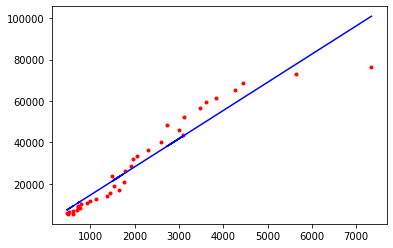

In [461]:
plt.plot(buses_train_X,pgdp_train_y,'r.')
plt.plot(buses_train_X,model.predict(buses_train_X),'b-')

In [ ]:
buses = data['Bus']